In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print(np.__version__)

1.26.0


In [3]:
# Reading the Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head(133)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
128,15722758,Male,30,17000,0
129,15792102,Female,26,84000,0
130,15675185,Male,31,58000,0
131,15801247,Male,33,31000,0


In [5]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [7]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [8]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [9]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_= sc.fit_transform(X_train)
X_test_= sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]} 



grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1') 
   
# fitting the model for grid search 
grid.fit(X_train_, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1', verbose=3)

In [34]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)

In [27]:
print(grid.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


In [66]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc = roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])
roc

0.49039615846338536

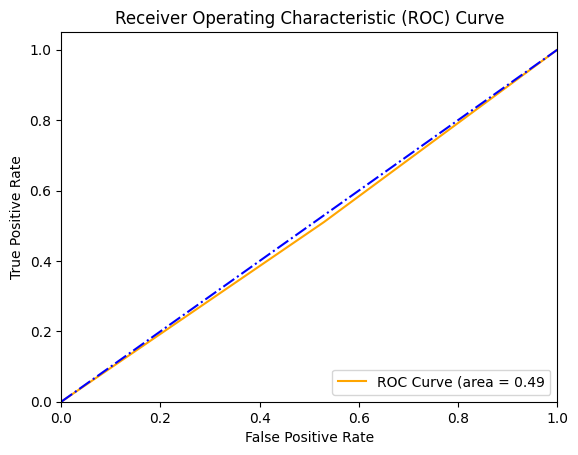

In [67]:
fpr,tpr,_= roc_curve(y_test,grid.predict_proba(X_test)[:,1])
auc = auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color ="orange",label = "ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color = "blue", linestyle='dashdot')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
table=pd.DataFrame.from_dict(re)

In [29]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004033,0.002200,0.000000,0.000000,gini,auto,10,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.004192,0.002575,0.000000,0.000000,gini,auto,100,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.050306,0.003596,0.008748,0.002355,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.687500,0.777778,0.809524,0.900000,0.918919,0.818744,0.084411,6
3,0.341958,0.007300,0.021551,0.001792,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.800000,0.871795,0.809524,0.900000,0.947368,0.865737,0.055418,1
4,0.036051,0.001133,0.007923,0.000610,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.833333,0.789474,0.809524,0.926829,0.888889,0.849610,0.050978,3
5,0.337183,0.007219,0.020464,0.000581,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.764706,0.842105,0.809524,0.900000,0.923077,0.847882,0.057954,4
6,0.000791,0.000995,0.000000,0.000000,entropy,auto,10,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.000148,0.000296,0.000000,0.000000,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.034388,0.002630,0.009271,0.001548,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.687500,0.810811,0.809524,0.871795,0.888889,0.813704,0.070683,7
9,0.331524,0.002862,0.022363,0.003123,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.727273,0.850000,0.809524,0.926829,0.918919,0.846509,0.073881,5


In [30]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}: 0.9256751954513147


In [31]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[79  6]
 [ 4 45]]


In [32]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        85
           1       0.88      0.92      0.90        49

    accuracy                           0.93       134
   macro avg       0.92      0.92      0.92       134
weighted avg       0.93      0.93      0.93       134



In [35]:
table_pr['Age']=X_test["Age"]
table_pr['Gender_male']=X_test["Gender_Male"]
table_pr['Estimated_Salary']=X_test["EstimatedSalary"]
table_pr['Actual']=y_test
table_pr['Predicted']=grid_predictions

In [ ]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("Children:"))
sex_male_input=int(input("Sex Male 0 or 1:"))
smoker_yes_input=int(input("Smoker Yes 0 or 1:"))

In [ ]:
Future_Prediction=grid.predict([[age_input,bmi_input,children_input,sex_male_input,smoker_yes_input]])# change the paramter,play with it.
print("Future_Prediction={}".format(Future_Prediction))